In [1]:
import tensorflow as tf 
print(tf.__version__)

2.13.0


In [2]:
import keras
keras.__version__

'2.13.1'

In [3]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
train=pd.read_table('train.txt', delimiter = ';', header=None, )
val=pd.read_table('val.txt', delimiter = ';', header=None, )
test=pd.read_table('test.txt', delimiter = ';', header=None, )

data = pd.concat([train ,  val , test])
data.columns = ["text", "label"]



In [4]:
data.shape

(20000, 2)

In [5]:
data.isna().any(axis=1).sum()

0

In [6]:
#text preprocessing
ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR   review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)


In [7]:
data['text']=data['text'].apply(lambda x: preprocess(x))


In [8]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['N_label'] = label_encoder.fit_transform(data['label'])


In [9]:
data['text']

0                                       didnt feel humili
1       go feel hopeless damn hope around someon care ...
2                    im grab minut post feel greedi wrong
3          ever feel nostalg fireplac know still properti
4                                            feel grouchi
                              ...                        
1995    keep feel like someon unkind wrong think get b...
1996              im feel littl cranki neg doctor appoint
1997                feel use peopl give great feel achiev
1998    im feel comfort derbi feel though start step s...
1999    feel weird meet w peopl text like dont talk fa...
Name: text, Length: 20000, dtype: object

In [10]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=500,ngram_range=(1,3))#example: the course was long-> [the,the course,the course was,course, course was, course was long,...]

data_cv = cv.fit_transform(data['text']).toarray()




In [11]:
data_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
#X_train, X_test, y_train, y_test=data_cv,test_cv,train['N_label'],test['N_label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(data_cv, data['N_label'], test_size=0.25, random_state=42)


In [19]:
# first neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
# split into input (X) and output (y) variables
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4124 - accuracy: 0.4483
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 1.0656 - accuracy: 0.6068
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9985 - accuracy: 0.6300
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9721 - accuracy: 0.6346
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9503 - accuracy: 0.6415
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9331 - accuracy: 0.6463
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9198 - accuracy: 0.6504
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9071 - accuracy: 0.6547
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8976 - accuracy: 0.6577
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.8443 

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

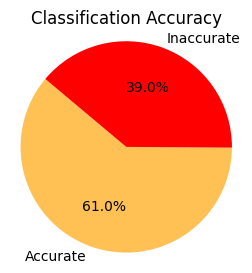

In [1]:
import matplotlib.pyplot as plt

#you have already calculated the accuracy
accuracy = 0.61  

# Calculate the percentage of accuracy and inaccuracy
accurate_percent = accuracy * 100
inaccurate_percent = 100 - accurate_percent

# Labels for the pie chart segments
labels = ['Accurate', 'Inaccurate']

# Sizes of each segment
sizes = [accurate_percent, inaccurate_percent]

# Colors for each segment
colors = ['#FFC154', 'red']

# Create a pie chart
plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Classification Accuracy')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()


In [27]:
# Sample text data and labels for a binary sentiment classification task
text_data = [
"i don t feel particularly agitated.",
"i feel a little mellow today.",
"i am feeling outraged it shows everywhere.",
"i spent the last two weeks of school feeling miserable.",
"im feeling really out of place and irritated",
"i didnt really feel that embarrassed;"
"i have the feeling she was amused and delighted;",
"i have been feeling the need to be creative;",
"i stopped feeling cold and began feeling hot",
"i feel selfish and spoiled",
"i feel selfish and spoiled",
"i feel i m being nutritionally supportive of it as well",
"i feel impatient i just post a blog entry and i feel ive gotten some words written and out into the world",
"i am trying my hardest so i can get to a place where i can join you and finally feel like i have something worthwhile to say",
"i have to admit i feel amused when i see the pti jamiat and a whole lot of others in the media try to avoid the suggestion that they are actually protesting the use of sharia in the case of raymond davis s release",
"i feel embarrassed that it got so bad",
"im feeling really bitter about this one",
"i feel brave today heading to amman and beirut by way of istanbul or i feel brave today a href http jessicadickinsongoodman",
"i had a fab christmas and an amazing new year with my family and friends and against all odds i feel very optimistic about",
"i feel like a loser everyone says they lost but i dont i know exactly where i am i just hate being here oh",
"i feel defeated but others i feel refreshed",
"i was feeling particularly vulnerable in a specific area so i began to talking to my friends and interestingly enough there was an incredible understanding of my struggle",
"i go onto the officer down memorial page and reflect on my feelings about that wonderful officer which seems to make me feel a little better",
"im with a group of people i still feel isolated and on the outside looking in",
"i feel blessed to know this family",
"i feel terrified because my landlord has not changed our locks yet",
"i am loosing out but i feel like i have have so much to share with many and if anything that is not unfortunate if anything it makes me grateful",
"i don t like eating meals that feel too virtuous",
"i left feeling pretty thrilled for the opportunity to at least throw my name in the hat",
"i feel kinda weird when andrea tries to talk to me about chris",
"i loved about ellie is that she didnt feel insulted by all the rude douche baggy things lothaire said to her because according to ellie insults only hurt when they come from somebody you respect damn straight",
"i feel was pretty triumphant",
"im enjoying my solitary confinement at home i rarely feel lonely",
"i am being over dramatic but i do feel very strongly for her and i am resolved to speak with her next chance i get",
"i really dont like quinn because i feel like she will just end up hurting barney and i hated the lame ted robin storyline",
"i feel so lousy but i shouldnt be focusing on me now",
"i cant remember ever feeling so exhausted it took trips with the car on the last day to get everything brought to the trailer",
"i wrote two years ago so many things i feel unsure of maybe",
"i feel suspicious of informality and a lack of credentials",
"i receive every month make me proud and feel appreciative",
"i feel that third situation pretty much sums up my feelings toward this title",
"i wanted to feel him in my hands and reached out to take him into my waiting eager mouth",
"i feel more gentle that way wth",
"i got home feeling hot tired and great",
"i feel more creative",
"i feel so talented i can use a computer",
"i feel unfathomably rich in having had a healthy pregnancy so far",
"i wish to know whether i should feel sympathetic towards the airline american if say their plane is on fire or their pilot has exploded or whether i should want to set them on fire if say they just decided to walk on their obligations to save money",
"i don t want them to feel so pressured",
"i still feel frightened of the world yet no where near as much as i used to",
"im not feeling mellow",
"i wake too early so i feel grumpy",
"i believe you all will come to my work place and just try to make me feel humiliated but you know what deep down in my heart i know who is the one who should be ashamed of themselves",
"i did finally get it if you didn t laugh left me feeling delighted exhausted and just so privileged",
"i was remembering this i was feeling skeptical",
"i have some pretty brazen goals and each day i feel stronger and more confident that i m going to reach my desired end result",
"i feel dirty talking to people for my personal gain",
"i sat there cold i flashed back to going to the hockey city classic and the degree weather and it feeling just as cold even though there was about a degree difference this night",
"i feel numb as i carry on and i wonder if i will get over it",
"i was somewhat coerced into this blog review so i feel a bit rushed and flustered",
"i guess i wont feel too jealous since i often do my mothering at the pool but its nice to have a husband again",
"im not sure how i feel about needing to exercise so as to maintain a pleasant demeanor",
"i feel alarmed"
    # Add more text samples here...
]

labels = [
    "fear",
    "joy",
    "anger",
    "sadness",
    "anger",
    "sadness",
    "joy",
    "joy",
    "anger",
    "anger",
    "love",
    "anger",
    "joy",
    "joy",
    "sadness",
    "anger",
    "joy",
    "joy",
    "sadness",
    "sadness",
    "fear",
    "joy",
    "love",
    "sadness",
    "fear",
    "sadness",
    "joy",
    "joy",
    "fear",
    "anger",
    "joy",
    "sadness",
    "joy",
    "anger",
    "sadness",
    "sadness",
    "fear",
    "fear",
    "joy",
    "joy",
    "joy",
    "love",
    "love",
    "joy",
    "joy",
    "joy",
    "love",
    "fear",
    "fear",
    "joy",
    "anger",
    "sad",
    "joy",
    "fear",
    "joy",
    "sadness",
    "anger",
    "sadness",
    "anger",
    "anger",
    "joy",
    "fear"

    # Add corresponding labels for each text sample...
]


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.2, random_state=42)

# Create a Bag of Words representation
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train a model (e.g., Naive Bayes)
model = MultinomialNB()
model.fit(X_train_bow, y_train)

# Make predictions on the test set
predicted_labels = model.predict(X_test_bow)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')
confusion = confusion_matrix(y_test, predicted_labels)
print(accuracy)
print(precision)
print(recall)
print(f1)


0.3076923076923077
0.36538461538461536
0.3076923076923077
0.2153846153846154


c:\Users\91944\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


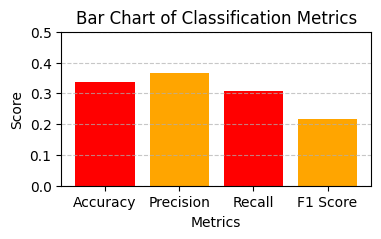

In [31]:
import matplotlib.pyplot as plt
import numpy as np


accuracy = 0.6176923076923077
precision = 0.36538461538461536
recall= 0.3076923076923077
f1_score=.2153846153846154

metrics = [accuracy, precision, recall, f1_score]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a bar chart
plt.figure(figsize=(4,2))
plt.bar(labels, metrics, color=['red', 'orange', 'red', 'orange'])
plt.ylim(0,0.5)  # Set the y-axis limit from 0 to 1 (assuming metrics are in the range [0, 1])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Bar Chart of Classification Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
import numpy as np
text='I feel sad'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 [==============================] - 0s 76ms/step


'sadness'

In [23]:
tf.keras.models.save_model(model,'my_model.h5')


C:\Users\91944\AppData\Local\Temp\ipykernel_3496\1493747194.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'my_model.h5')


In [24]:
import pickle
pickle.dump(label_encoder, open('encoder.pkl', 'wb'))
pickle.dump(cv, open('CountVectorizer.pkl', 'wb'))
